# TOMATO LEAF DISEASE DETECTION USING VGG19

Importing all dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


Adding the path


In [2]:
path = "H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

['train', 'valid']

Join train and test with path

In [3]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "valid")
print(os.listdir(test_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


Applying glob function

In [4]:
from glob import glob
folders = glob("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train/*")
folders

['H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___Bacterial_spot',
 'H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___Early_blight',
 'H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___healthy',
 'H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___Late_blight',
 'H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___Leaf_Mold',
 'H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___Septoria_leaf_spot',
 'H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___Target_Spot',
 'H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train\\Tomato___Tomato_mosai

Text(0.5, 1.0, 'Bacterial Spot')

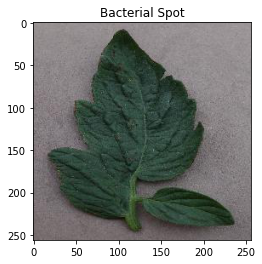

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

Text(0.5, 1.0, 'Early Blight')

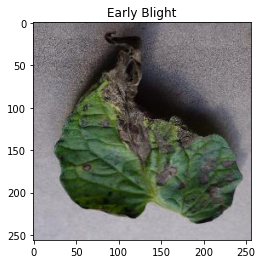

In [6]:
plt.imshow(plt.imread("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato//New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG"))
plt.title("Early Blight")

Text(0.5, 1.0, 'Late Blight')

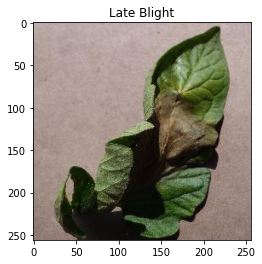

In [7]:
plt.imshow(plt.imread("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG"))
plt.title("Late Blight")

Importing necessary packages

In [8]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

Image size

In [9]:
SIZE = [128, 128]

Importing VGG19

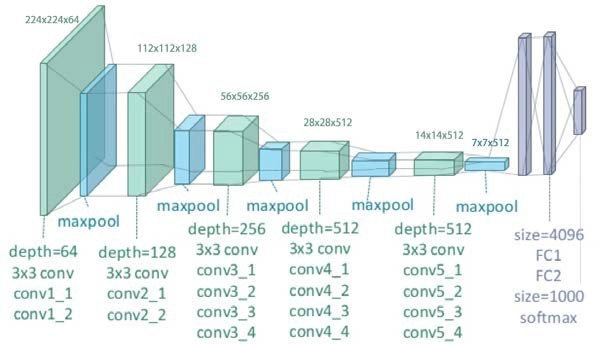

In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

 vgg19 with input shape and weight is imagenet

In [11]:
vg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

In [12]:
for layer in vg19.layers:
    layer.trainable = False

In [13]:
x = Flatten()(vg19.output)

In [14]:
prediction = Dense(len(folders), activation="softmax")(x)

modelvg = Model(inputs=vg19.input, outputs=prediction)

VGG19 model summary

In [15]:
modelvg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Compile model

In [16]:
modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

Data Augmentation

In [17]:
train_datagen_vg19 = ImageDataGenerator(rescale=1./255)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [18]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=True)

Found 18345 images belonging to 10 classes.


In [19]:
testing_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(128, 128),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=False)

Found 4585 images belonging to 10 classes.


Model fit_generator

In [20]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

r_vg19 = modelvg.fit_generator(trainning_set_vg19,
                       validation_data=testing_set_vg19,
                       epochs=10,
                       callbacks=[callback]
                       )

<ipython-input-20-11692eb06477>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r_vg19 = modelvg.fit_generator(trainning_set_vg19,


Epoch 1/10
1147/1147 [==============================] - 2289s 2s/step - loss: 0.7595 - accuracy: 0.7478 - val_loss: 0.5785 - val_accuracy: 0.8013
Epoch 2/10
1147/1147 [==============================] - 2038s 2s/step - loss: 0.4402 - accuracy: 0.8500 - val_loss: 0.4641 - val_accuracy: 0.8445
Epoch 3/10
1147/1147 [==============================] - 1901s 2s/step - loss: 0.3463 - accuracy: 0.8835 - val_loss: 0.4543 - val_accuracy: 0.8495
Epoch 4/10
1147/1147 [==============================] - 2531s 2s/step - loss: 0.2787 - accuracy: 0.9057 - val_loss: 0.4061 - val_accuracy: 0.8617
Epoch 5/10
1147/1147 [==============================] - 2383s 2s/step - loss: 0.2293 - accuracy: 0.9203 - val_loss: 0.3890 - val_accuracy: 0.8709
Epoch 6/10
1147/1147 [==============================] - 2260s 2s/step - loss: 0.1940 - accuracy: 0.9336 - val_loss: 0.3588 - val_accuracy: 0.8781
Epoch 7/10
1147/1147 [==============================] - 1848s 2s/step - loss: 0.1717 - accuracy: 0.9430 - val_loss: 0.4335 -

# Visualization for VGG19

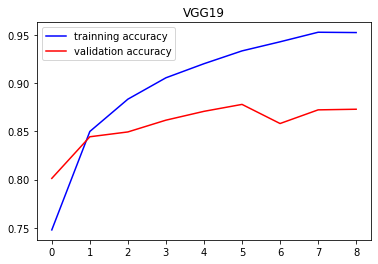

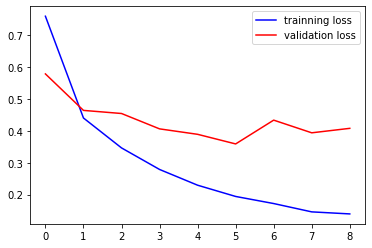

In [21]:
import matplotlib.pyplot as plt
accuracy = r_vg19.history['accuracy']
val_accuracy = r_vg19.history['val_accuracy']
loss = r_vg19.history['loss']
val_loss = r_vg19.history['val_loss']
epochs = range(len(accuracy))
plt.title("VGG19")
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [22]:
y_pred = modelvg.predict(testing_set_vg19)

In [23]:
y_pred

array([[9.9912912e-01, 3.4328410e-04, 3.2787542e-05, ..., 4.6819999e-04,
        1.2042792e-11, 6.8430789e-14],
       [9.9869722e-01, 1.2853534e-03, 7.8940293e-06, ..., 1.7027174e-08,
        4.4990799e-15, 1.0563260e-12],
       [9.9984777e-01, 8.7998596e-05, 2.0946256e-05, ..., 9.1979618e-06,
        6.6090261e-10, 9.5537231e-09],
       ...,
       [4.2085323e-04, 3.0433375e-05, 3.8465066e-04, ..., 5.0753115e-06,
        5.4985878e-07, 9.9796343e-01],
       [3.4840484e-04, 2.6550245e-07, 1.5368896e-06, ..., 7.6961122e-09,
        1.5528991e-09, 9.9959749e-01],
       [1.7293416e-08, 2.7507371e-03, 7.5074161e-07, ..., 5.9858024e-08,
        1.1517774e-05, 9.7133934e-01]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

# Tomato Bacterial Spot

In [25]:
test_img = plt.imread("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")

# Visualize

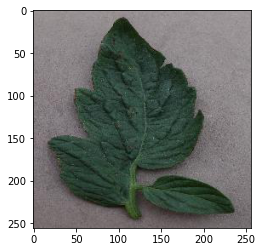

In [26]:
plt.imshow(test_img)

# Save model

In [27]:
modelvg.save("vgg_19tl.model")

INFO:tensorflow:Assets written to: vgg_19tl.model\assets


# load a image and detection

In [28]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (128, 128))
    return new_array.reshape(-1, 128, 128, 3)

model = tf.keras.models.load_model("vgg_19tl.model")A

# Prediction

# Class Dictionary

In [29]:
class_dict = trainning_set_vg19.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

# label

In [30]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

In [31]:
prediction = model.predict([prepare("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/0a334ae6-bea3-4453-b200-85e082794d56___GH_HL Leaf 310.1_flipTB.JPG")])
prediction_cls(prediction)

'Tomato___healthy'

In [32]:
prediction = model.predict([prepare("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/101849ce-d61a-4c2f-a6a7-8da0d71f237e___YLCV_NREC 2725.JPG")])

prediction_cls(prediction)

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

In [34]:
prediction = model.predict([prepare("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Early_blight/0e2abcfb-e62b-4c61-a24a-0800cad904a8___RS_Erly.B 7382.JPG")])

prediction_cls(prediction)

'Tomato___Early_blight'

In [35]:
prediction = model.predict([prepare("H:/3rd Year/6th SEM/TAA1- Tarp/Tomato/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_mosaic_virus/0c779116-043c-4715-b080-16be2e8d2552___PSU_CG 2285_270deg.JPG")])

prediction_cls(prediction)

'Tomato___Tomato_mosaic_virus'